# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 0. Warning

- Before trying to running the code, initialized the path and save_path (which is the path to save/load your model) first.
- Tuning may take a lot of time (Our longest is ~12 hour for a single model), so our team suggest to running it cell by cell, and saving model right after the tuning proces is done.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    return image_array, image_label

In [ ]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [ ]:
## load dataset here
PATH = "" # Path to your file

save_path = "" # Path to save/load your model

df = pd.read_csv(PATH)
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [ ]:
## parsing data here
images, labels = parse_data(df)

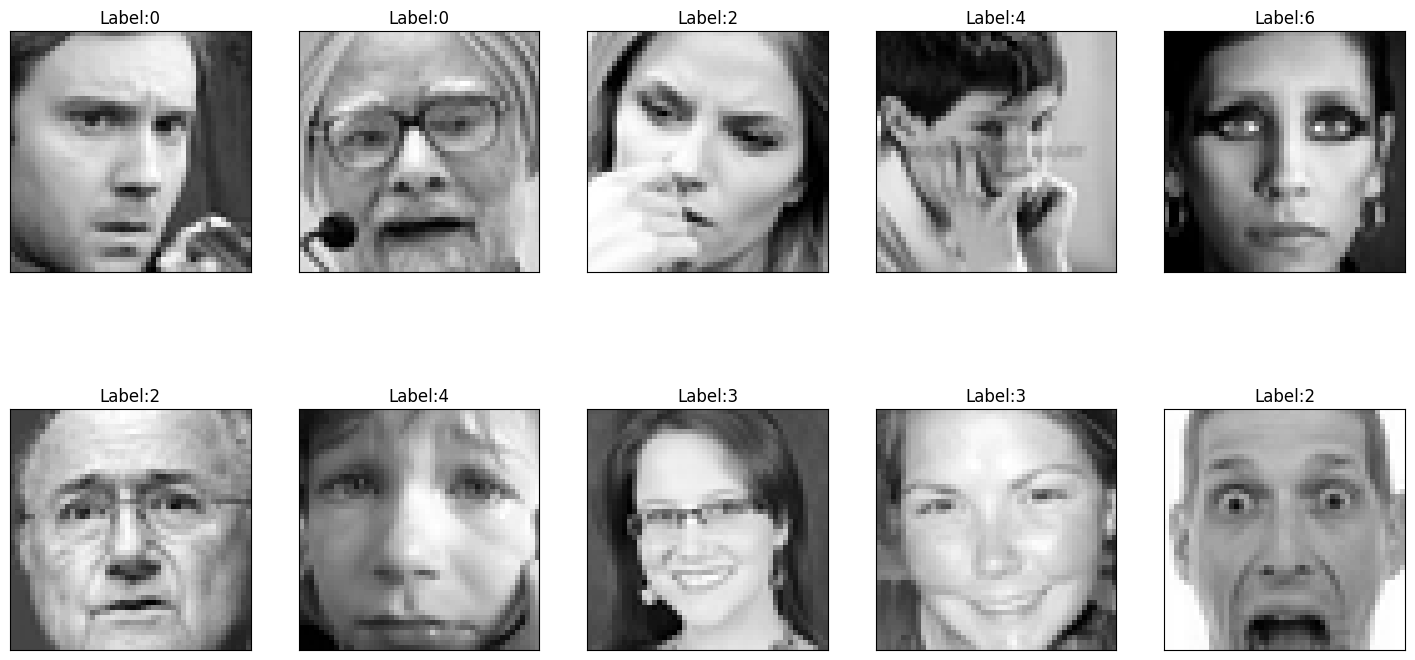

In [ ]:
## showing images here
show_img(images, labels)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

In [ ]:
from sklearn.decomposition import PCA
# Reshape images for PCA (flatten the 48x48 images into vectors)
images_flat = images.reshape((images.shape[0], -1))
# Perform PCA to reduce the dimensions to 2
pca = PCA(n_components=2)

In [ ]:
## transform for visualizing here
images_pca = pca.fit_transform(images_flat)
images_pca.shape

(35887, 2)

In [ ]:
# Create a DataFrame with the PCA results and the labels
pca_df = pd.DataFrame(data=images_pca, columns=['PC1', 'PC2'])
pca_df['Label'] = labels
pca_df

,PC1,PC2,Label
0,691.750859,-442.328662,0
1,-62.025489,561.762205,0
2,-1322.538070,-415.729663,2
3,-232.277887,656.803931,4
4,1796.585834,-2005.093943,6
...,...,...,...
35882,3033.753533,481.233807,6
35883,-2074.831840,167.194805,3
35884,-1289.155652,-1408.568323,0
35885,2008.413571,-125.610926,3


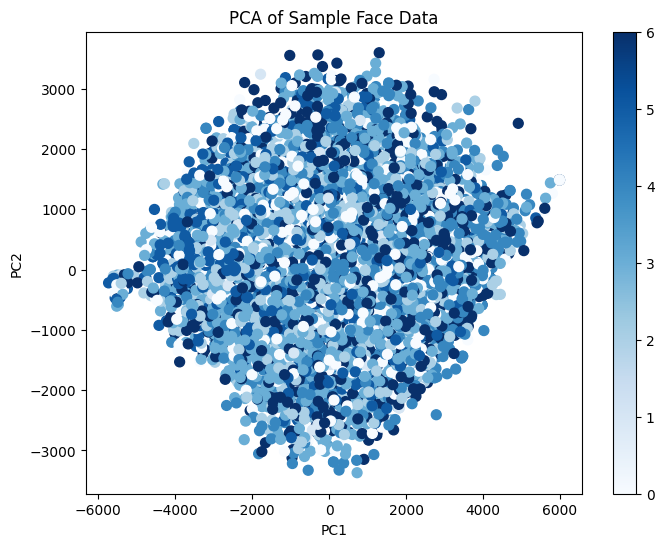

In [ ]:
# Visualize the data projected onto the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(images_pca[:, 0], images_pca[:, 1], c=labels, cmap='Blues', s=50)
plt.colorbar()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Sample Face Data')
plt.show()

Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

In [ ]:
## Determine the optimal number of PCs here
# Perform PCA to capture explained variance for each component
pca_full = PCA().fit(images_flat)
# Get explained variance for each component
explained_variance = pca_full.explained_variance_ratio_
# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

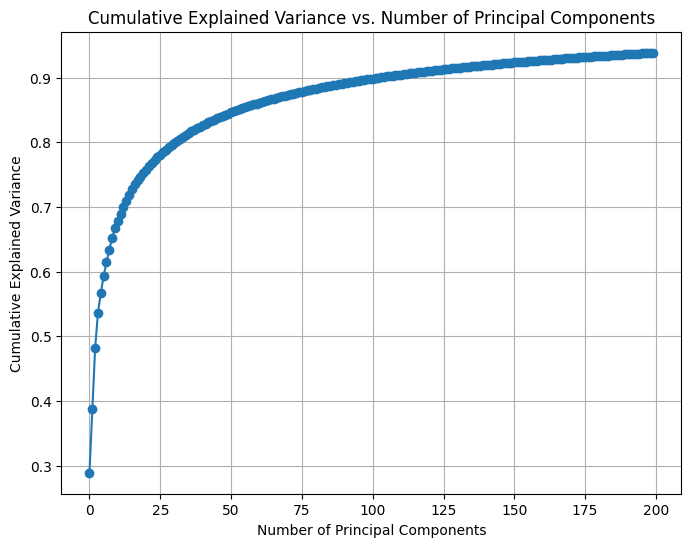

In [ ]:
# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(cumulative_explained_variance[:200], marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

In [ ]:
# Print explained variance ratios
print("Explained variance ratios:", explained_variance)
print("Cumulative explained variance:", cumulative_explained_variance)

Explained variance ratios: [2.89265103e-01 9.80238969e-02 9.42553215e-02 ... 4.65714084e-07
 4.53200711e-07 4.18363420e-07]
Cumulative explained variance: [0.2892651  0.387289   0.48154432 ... 0.99999913 0.99999958 1.        ]


## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

### Preprocessing using HOG

In [ ]:
from skimage.feature import hog
import cv2

def resize_images(images: np.ndarray, size=(10, 10)): ## default
    resized_images = np.zeros((images.shape[0], size[0], size[1]))

    for i in range(images.shape[0]):
        resized_images[i] = cv2.resize(images[i], size)
                                      #  interpolation = cv2.INTER_LINEAR)
    return resized_images

In [ ]:
def prepare_data_hog(data_path, image_size = (48, 48)):
    """
    Prepares the data by reading, resizing, and scaling the images.
    """
    data = pd.read_csv(data_path)
    images, labels = parse_data(data)

    # Resize images
    images_resized = resize_images(images, size = image_size)

    # Flatten
    images_flat = images_resized.reshape(images_resized.shape[0], -1)
    # Normalize images
    images_normalized = images_resized / 255.0

    return images_normalized, labels

In [ ]:
def extract_hog_features(images):
    """
    Extracts HOG features from the images.
    """
    hog_features = []
    hog_images = []
    for image in images:
        feature, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)
        hog_features.append(feature)
        hog_images.append(hog_image)
    return np.array(hog_features), np.array(hog_images)

In [ ]:
def show_hog_img(hog_images: np.ndarray, labels: np.ndarray):
    """
    Display the first 10 HOG images with their labels.
    """
    _, axarr = plt.subplots(nrows =2, ncols=5, figsize=(18, 9))
    axarr = axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(hog_images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))
    plt.show()

In [ ]:
test,_ = prepare_data_hog(PATH)

feature_hog, feature_hog_images = extract_hog_features(test)

<ipython-input-16-92a93aa188d3>:8: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  feature, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)


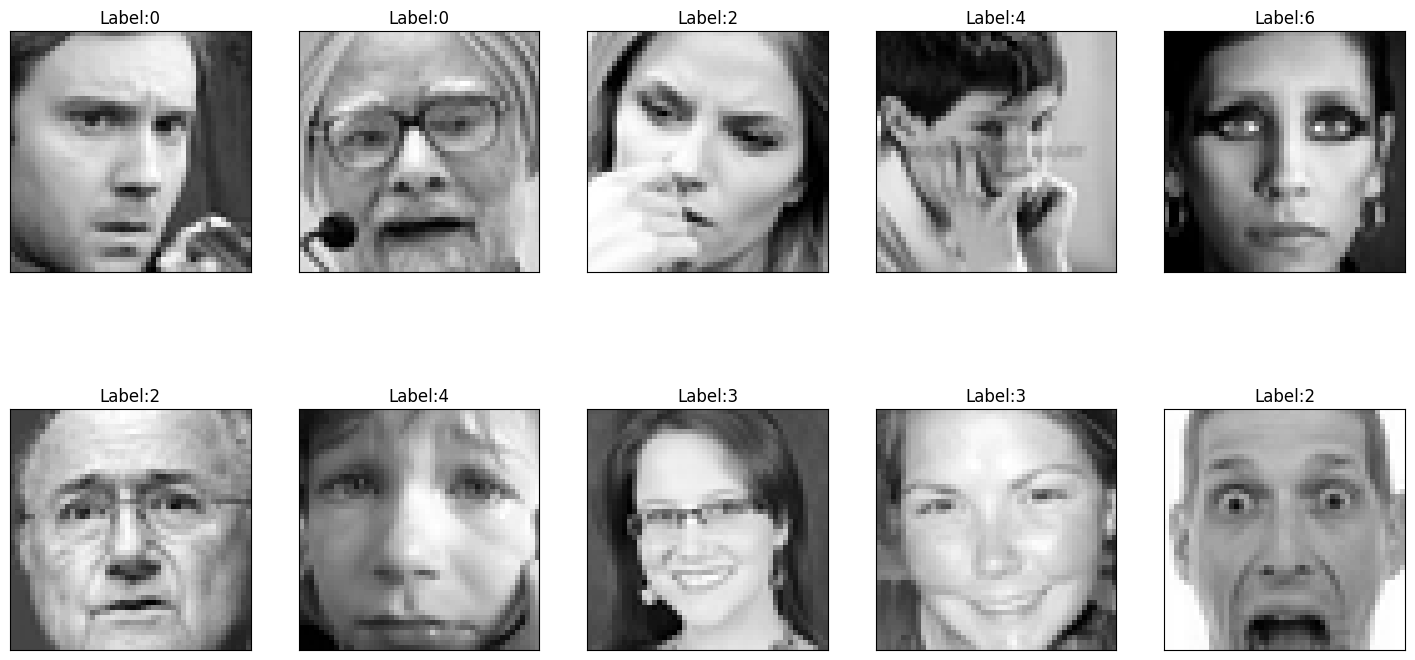

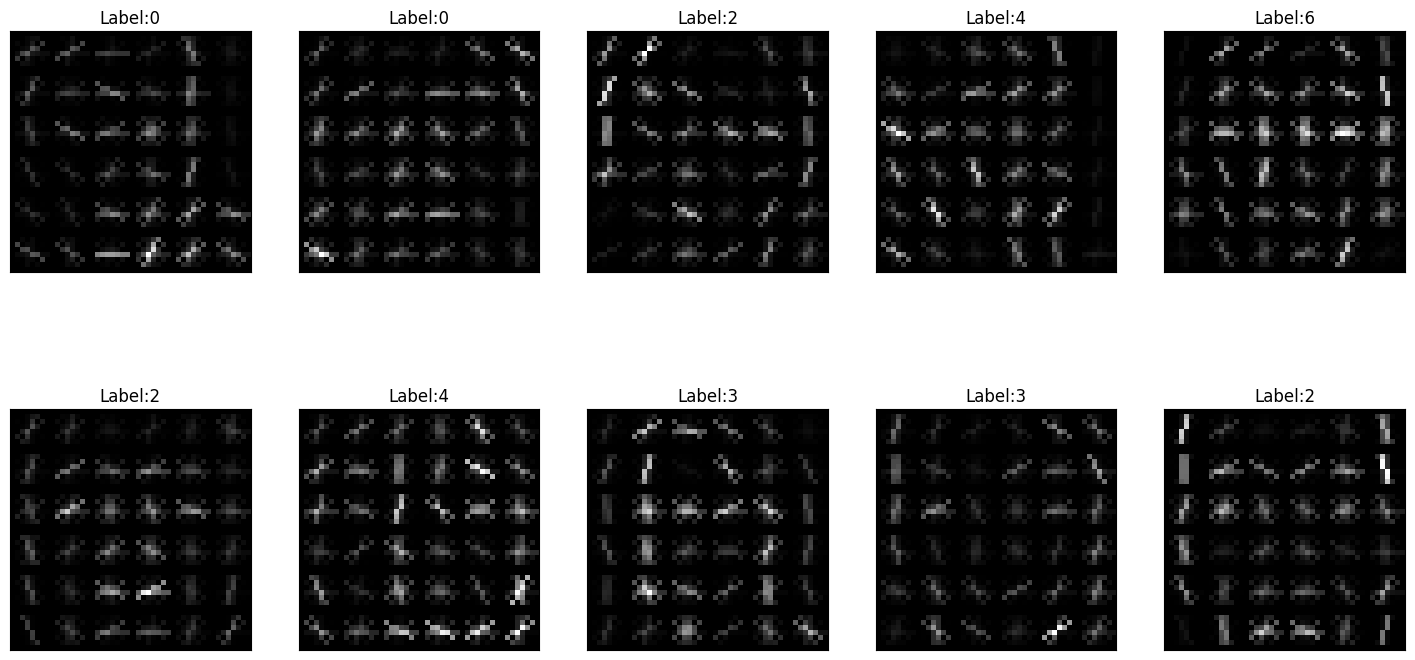

In [ ]:
show_img(images[:10], labels[:10])
show_hog_img(feature_hog_images[:10], df["emotion"][:10])

### Spliting data

#### Original data

In [ ]:
def prepare_X_y(df):
    ## Split X, y from dataset
    y = df["emotion"]
    X = feature_hog
    return X, y

X, y = prepare_X_y(df)
print(X)
print(y)

[[0.18922776 0.22484232 0.32543423 ... 0.26447044 0.24639473 0.04476294]
 [0.22615877 0.31158486 0.31158486 ... 0.23777741 0.23777741 0.23777741]
 [0.12122483 0.32834407 0.16366126 ... 0.06562373 0.10612307 0.20101334]
 ...
 [0.05645017 0.00121363 0.01205269 ... 0.0176126  0.05846277 0.03628471]
 [0.2904947  0.2904947  0.04839633 ... 0.01378545 0.09767768 0.24835769]
 [0.0970933  0.30630233 0.30630233 ... 0.00236828 0.00203078 0.        ]]
0        0
1        0
2        2
3        4
4        6
        ..
35882    6
35883    3
35884    0
35885    3
35886    2
Name: emotion, Length: 35887, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42
TRAIN_SIZE = 0.8


trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

#### Transformed data

In [ ]:
def prepare_X_y_pca(df):
    ## Split X, y from dataset
    y = df["emotion"]
    X = feature_hog
    pca = PCA(n_components=100)
    X = pca.fit_transform(X)
    return X, y

X_pca, y_pca = prepare_X_y_pca(df)
print(X)
print(y)

[[0.18922776 0.22484232 0.32543423 ... 0.26447044 0.24639473 0.04476294]
 [0.22615877 0.31158486 0.31158486 ... 0.23777741 0.23777741 0.23777741]
 [0.12122483 0.32834407 0.16366126 ... 0.06562373 0.10612307 0.20101334]
 ...
 [0.05645017 0.00121363 0.01205269 ... 0.0176126  0.05846277 0.03628471]
 [0.2904947  0.2904947  0.04839633 ... 0.01378545 0.09767768 0.24835769]
 [0.0970933  0.30630233 0.30630233 ... 0.00236828 0.00203078 0.        ]]
0        0
1        0
2        2
3        4
4        6
        ..
35882    6
35883    3
35884    0
35885    3
35886    2
Name: emotion, Length: 35887, dtype: int64


In [ ]:
trainX_pca, testX_pca ,trainY_pca, testY_pca = train_test_split(X_pca, y_pca, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

### Model 1: Random forest

#### Original data

In [ ]:
## Building model

from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

def build_model(X, y):
    model = make_pipeline(MinMaxScaler(),RandomForestClassifier())
    model.fit(X,y)

    return model

model_rf = build_model(trainX, trainY)


In [ ]:
## Tuning

## Based on our default model, we found out that our max_depth tree range from 30-40 and estimator from 90-100
## It's recommended that a random forest model should be wide so we try to make it more wide by tuning max_depth and n_estimator

from sklearn.model_selection import GridSearchCV

class_weight = [None,'balanced']

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 120, num = 12)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 25, num = 4)]

bootstrap = [True, False]

param_grid = {'randomforestclassifier__class_weight': class_weight,
               'randomforestclassifier__n_estimators': n_estimators,
               'randomforestclassifier__max_features': max_features,
               'randomforestclassifier__max_depth': max_depth,
               'randomforestclassifier__bootstrap': bootstrap}


model_rf = GridSearchCV(estimator = model_rf, param_grid = param_grid,
                          cv = 5, n_jobs = -1, verbose = 0)
model_rf.fit(trainX,trainY)

model_rf = model_rf.best_estimator_

In [ ]:
## Saving model

import pickle

with open(save_path + 'model_rf.pkl','wb') as f:
    pickle.dump(model_rf,f)

In [ ]:
## Loading model
import pickle

with open(save_path + 'model_rf.pkl' , 'rb') as f:
    model_rf = pickle.load(f)

In [ ]:
## Evaluation
from sklearn.metrics import classification_report
def calculate_performance(y_true, y_pred):

    print(classification_report(y_true, y_pred))
    return

pred = model_rf.predict(testX)
calculate_performance(testY, pred)

              precision    recall  f1-score   support

           0       0.44      0.24      0.31       985
           1       0.93      0.25      0.39       102
           2       0.48      0.27      0.34      1043
           3       0.47      0.83      0.60      1765
           4       0.34      0.32      0.33      1210
           5       0.75      0.47      0.58       795
           6       0.43      0.42      0.43      1278

    accuracy                           0.46      7178
   macro avg       0.55      0.40      0.42      7178
weighted avg       0.48      0.46      0.44      7178



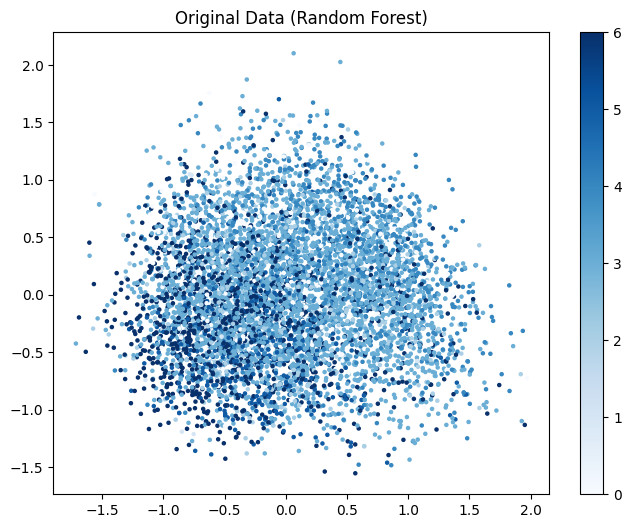

In [ ]:
## Plotting
pca_2d = PCA(n_components=2)
testX_2d = pca_2d.fit_transform(testX)

fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(testX_2d[:, 0], testX_2d[:, 1], c=pred, cmap='Blues', s=5)
plt.colorbar(sc, ax=ax)
ax.set_title('Original Data (Random Forest)')
plt.show()

#### Transformed data

In [ ]:
## Building model

model_rf_pca = build_model(trainX_pca, trainY_pca)

In [ ]:
## Tuning

## Based on our default model, we found out that our max_depth tree range from 30-40 and estimator from 90-100
## It's recommended that a random forest model should be wide so we try to make it more wide by tuning max_depth and n_estimator

from sklearn.model_selection import GridSearchCV

class_weight = [None,'balanced']

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 120, num = 12)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 25, num = 4)]

bootstrap = [True, False]

param_grid = {'randomforestclassifier__class_weight': class_weight,
               'randomforestclassifier__n_estimators': n_estimators,
               'randomforestclassifier__max_features': max_features,
               'randomforestclassifier__max_depth': max_depth,
               'randomforestclassifier__bootstrap': bootstrap}

model_rf_pca = GridSearchCV(estimator = model_rf_pca, param_grid = param_grid,
                          cv = 5, n_jobs = -1, verbose = 0)
model_rf_pca.fit(trainX_pca,trainY_pca)

model_rf_pca = model_rf_pca.best_estimator_

In [ ]:
## Saving model

import pickle



with open(save_path + 'model_rf_pca.pkl','wb') as f:
    pickle.dump(model_rf_pca,f)

In [ ]:
## Loading model
import pickle

with open(save_path + 'model_rf_pca.pkl' , 'rb') as f:
    model_rf_pca = pickle.load(f)

In [ ]:
## Evaluation
pred = model_rf_pca.predict(testX_pca)
calculate_performance(testY_pca, pred)

              precision    recall  f1-score   support

           0       0.44      0.26      0.33       985
           1       1.00      0.25      0.41       102
           2       0.50      0.28      0.36      1043
           3       0.46      0.83      0.59      1765
           4       0.36      0.34      0.35      1210
           5       0.78      0.51      0.62       795
           6       0.44      0.40      0.42      1278

    accuracy                           0.47      7178
   macro avg       0.57      0.41      0.44      7178
weighted avg       0.49      0.47      0.45      7178



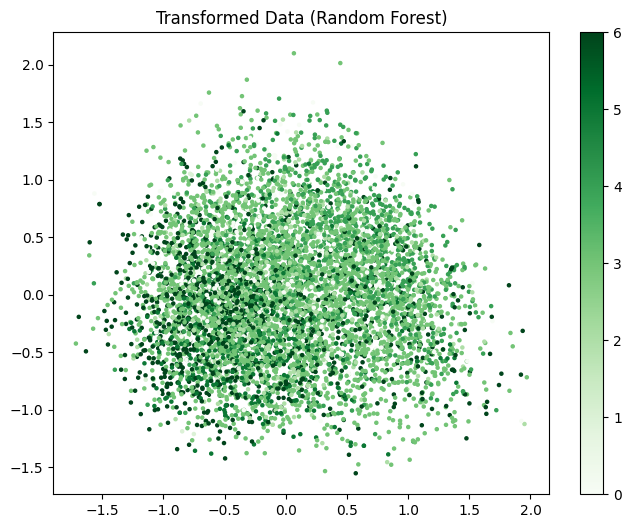

In [ ]:
## Plotting
# PCA with 2 components for visualization of transformed data
pca_2d = PCA(n_components=2)
testX_pca_2d = pca_2d.fit_transform(testX_pca)

# Plotting PCA data in 2D
plt.figure(figsize=(8, 6))
sc = plt.scatter(testX_pca_2d[:, 0], testX_pca_2d[:, 1], c=pred, cmap='Greens', s=5)
plt.colorbar(sc)
plt.title('Transformed Data (Random Forest)')
plt.show()

### Model 2: Support Vector

#### Original data

In [ ]:
## Building model
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

def build_model(X, y):

    model = make_pipeline(MinMaxScaler(), SVC())
    model.fit(X,y)

    return model

model_svc = build_model(trainX, trainY)

In [ ]:
## Tuning

## In this model, we just try out some recommended online to see what could work
from sklearn.model_selection import GridSearchCV

param_grid = {
    'svc__C': [0,  10, 100],
    'svc__gamma': ['scale', 'auto'],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__class_weight': ['balanced']
}


model_svc = GridSearchCV(estimator = model_svc, param_grid = param_grid,
                          cv = 5, n_jobs = -1, verbose = 0)
model_svc.fit(trainX,trainY)

model_svc = model_svc.best_estimator_

In [ ]:
## Saving model

import pickle


with open(save_path + 'model_svc.pkl','wb') as f:
    pickle.dump(model_svc,f)

In [ ]:
## Loading model
import pickle
path = '/content/drive/MyDrive/'
with open(save_path + 'model_svc.pkl' , 'rb') as f:
    model_svc = pickle.load(f)

In [ ]:
## Evaluation

pred = model_svc.predict(testX)
calculate_performance(testY, pred)

              precision    recall  f1-score   support

           0       0.47      0.36      0.41       985
           1       1.00      0.18      0.30       102
           2       0.46      0.32      0.38      1043
           3       0.62      0.78      0.69      1765
           4       0.39      0.47      0.42      1210
           5       0.72      0.59      0.65       795
           6       0.48      0.50      0.49      1278

    accuracy                           0.52      7178
   macro avg       0.59      0.46      0.48      7178
weighted avg       0.53      0.52      0.52      7178



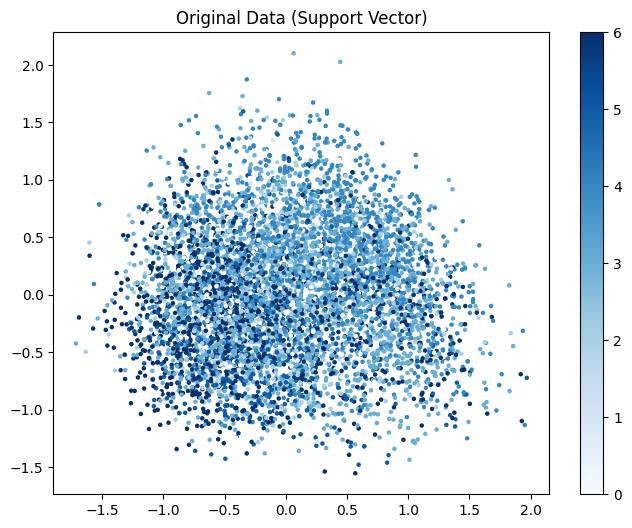

In [ ]:
## Plotting original data in 2D using PCA transformation
pca_2d = PCA(n_components=2)
testX_2d = pca_2d.fit_transform(testX)

fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(testX_2d[:, 0], testX_2d[:, 1], c=pred, cmap='Blues', s=5)
plt.colorbar(sc, ax=ax)
ax.set_title('Original Data (Support Vector)')
plt.show()

#### Transformed data

In [ ]:
## Building model

model_svc_pca = build_model(trainX_pca, trainY_pca)

In [ ]:
## Tuning

## In this model, we just try out some recommended online to see what could work
param_grid = {
    'svc__C': [0,  10, 100],
    'svc__gamma': ['scale', 'auto'],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__class_weight': ['balanced']
}

model_svc_pca = GridSearchCV(estimator = model_svc_pca, param_grid = param_grid,
                          cv = 5, n_jobs = -1, verbose = 0)
model_svc_pca.fit(trainX_pca,trainY_pca)

model_svc_pca = model_svc_pca.best_estimator_

In [ ]:
## Saving model

import pickle



with open(save_path + 'model_svc_pca.pkl','wb') as f:
    pickle.dump(model_svc_pca,f)

In [ ]:
## Loading model
import pickle
path = '/content/drive/MyDrive/'
with open(save_path + 'model_svc_pca.pkl' , 'rb') as f:
    model_svc_pca = pickle.load(f)

In [ ]:
## Evaluation

pred = model_svc_pca.predict(testX_pca)
calculate_performance(testY_pca, pred)

              precision    recall  f1-score   support

           0       0.45      0.36      0.40       985
           1       1.00      0.23      0.37       102
           2       0.48      0.30      0.37      1043
           3       0.61      0.78      0.69      1765
           4       0.39      0.47      0.43      1210
           5       0.72      0.61      0.66       795
           6       0.47      0.50      0.49      1278

    accuracy                           0.52      7178
   macro avg       0.59      0.46      0.48      7178
weighted avg       0.53      0.52      0.51      7178



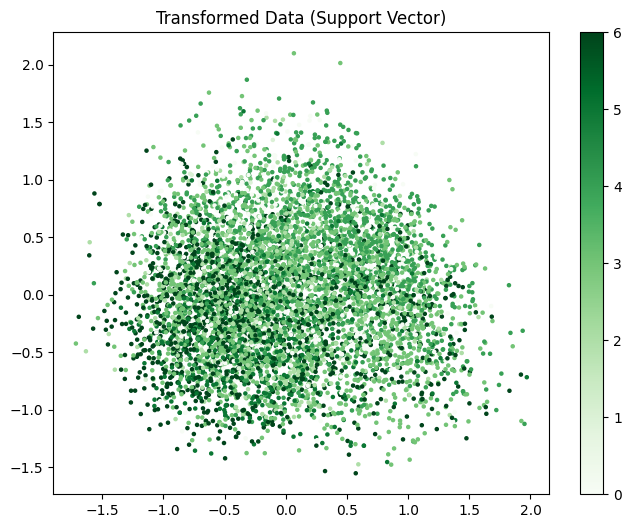

In [ ]:
## Plotting
# PCA with 2 components for visualization of transformed data
testX_pca_2d = pca_2d.fit_transform(testX_pca)

# Plotting PCA data in 2D
plt.figure(figsize=(8, 6))
sc = plt.scatter(testX_pca_2d[:, 0], testX_pca_2d[:, 1], c=pred, cmap='Greens', s=5)
plt.colorbar(sc)
plt.title('Transformed Data (Support Vector)')
plt.show()

### Model 3: XGBoost

#### Original data

In [ ]:
## Building model

import xgboost as xgb

def build_model(X, y):

    model = make_pipeline(MinMaxScaler(),xgb.XGBClassifier(objective = 'multi:softmax',n_class = 7))
    model.fit(X,y)

    return model


model_xgb = build_model(trainX, trainY)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [08:13:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_class" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
## Tuning

## Like in rf model, we try to make the model wider 
from sklearn.model_selection import GridSearchCV

param_grid = { 'xgbclassifier__max_depth': [3, 6, 10],
           'xgbclassifier__learning_rate': [0.01, 0.05, 0.1],
           'xgbclassifier__n_estimators': [100, 500, 1000],
           'xgbclassifier__colsample_bytree': [0.3, 0.7]}

model_xgb = GridSearchCV(estimator = model_xgb, param_grid = param_grid,
                          cv = 5, n_jobs = -1, verbose = 0)
model_xgb.fit(trainX,trainY)

model_xgb = model_xgb.best_estimator_

In [ ]:
## Saving model

import pickle

with open(save_path + 'model_xgb.pkl','wb') as f:
    pickle.dump(model_xgb,f)

In [ ]:
## Loading model
import pickle
path = '/content/drive/MyDrive/'
with open(save_path + 'model_xgb.pkl' , 'rb') as f:
    model_xgb = pickle.load(f)

In [ ]:
## Evaluation

pred = model_xgb.predict(testX)
calculate_performance(testY, pred)

              precision    recall  f1-score   support

           0       0.42      0.35      0.38       985
           1       0.87      0.26      0.41       102
           2       0.43      0.35      0.38      1043
           3       0.59      0.75      0.66      1765
           4       0.37      0.39      0.38      1210
           5       0.71      0.58      0.64       795
           6       0.43      0.46      0.45      1278

    accuracy                           0.50      7178
   macro avg       0.55      0.45      0.47      7178
weighted avg       0.50      0.50      0.49      7178



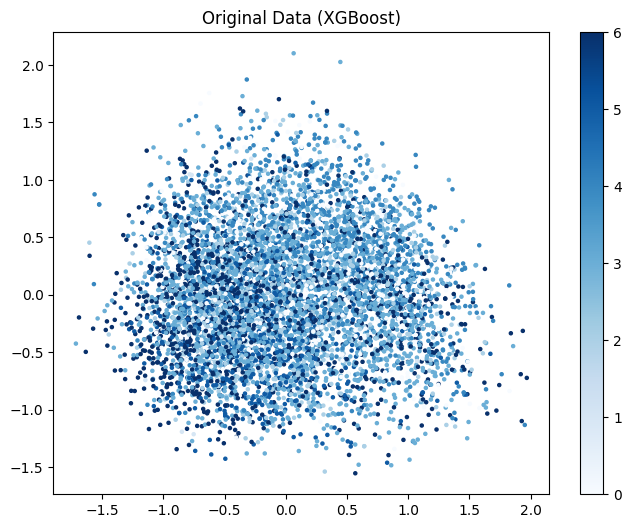

In [ ]:
## Plotting original data in 2D using PCA transformation
pca_2d = PCA(n_components=2)
testX_2d = pca_2d.fit_transform(testX)

fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(testX_2d[:, 0], testX_2d[:, 1], c=pred, cmap='Blues', s=5)
plt.colorbar(sc, ax=ax)
ax.set_title('Original Data (XGBoost)')
plt.show()

#### Transformed data

In [ ]:
## Building model

model_xgb_pca = build_model(trainX_pca, trainY_pca)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [08:21:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_class" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
## Tuning

## Like in rf model, we try to make the model wider 
param_grid = { 'xgbclassifier__max_depth': [3,6,10],
           'xgbclassifier__learning_rate': [0.01, 0.05, 0.1],
           'xgbclassifier__n_estimators': [100, 500, 1000],
           'xgbclassifier__colsample_bytree': [0.3, 0.7]}

model_xgb_pca = GridSearchCV(estimator = model_xgb_pca, param_grid = param_grid,
                          cv = 5, n_jobs = -1, verbose = 0)
model_xgb_pca.fit(trainX_pca,trainY_pca)

model_xgb_pca = model_xgb_pca.best_estimator_

In [ ]:
## Saving model

import pickle


with open(save_path + 'model_xgb_pca.pkl','wb') as f:
    pickle.dump(model_xgb_pca,f)

In [ ]:
## Loading model
import pickle

with open(save_path + 'model_xgb_pca.pkl' , 'rb') as f:
    model_xgb_pca = pickle.load(f)

In [ ]:
## Evaluation

pred = model_xgb_pca.predict(testX_pca)
calculate_performance(testY_pca, pred)

              precision    recall  f1-score   support

           0       0.41      0.31      0.35       985
           1       0.94      0.29      0.45       102
           2       0.40      0.33      0.36      1043
           3       0.57      0.74      0.65      1765
           4       0.37      0.38      0.37      1210
           5       0.68      0.59      0.63       795
           6       0.44      0.45      0.44      1278

    accuracy                           0.49      7178
   macro avg       0.54      0.44      0.46      7178
weighted avg       0.48      0.49      0.48      7178



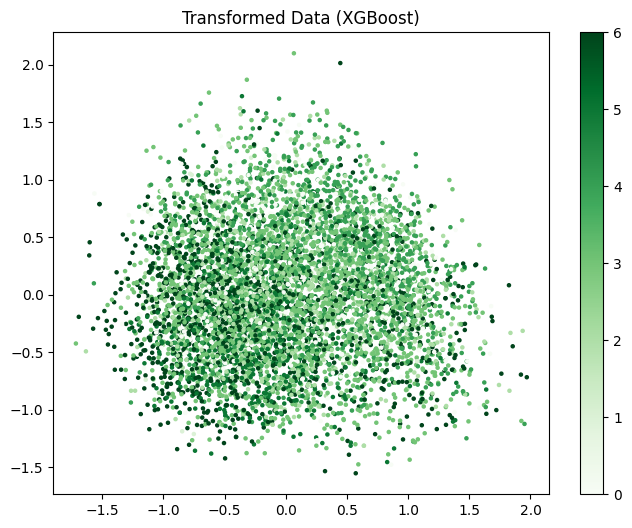

In [ ]:
## Plotting
# PCA with 2 components for visualization of transformed data
testX_pca_2d = pca_2d.fit_transform(testX_pca)

# Plotting PCA data in 2D
plt.figure(figsize=(8, 6))
sc = plt.scatter(testX_pca_2d[:, 0], testX_pca_2d[:, 1], c=pred, cmap='Greens', s=5)
plt.colorbar(sc)
plt.title('Transformed Data (XGBoost)')
plt.show()

### Model 4: MLP Classifier

#### Original data

In [ ]:
## Building model

from sklearn.neural_network import MLPClassifier

def build_model(X, y):

    model = make_pipeline(MinMaxScaler(),MLPClassifier(random_state=RANDOM_STATE))
    model.fit(X,y)

    return model

model_mlp = build_model(trainX, trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
## Tuning

## In this model, we just try out some recommended online to see what could work
param_grid = {
    'mlpclassifier__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50, 25)],
    'mlpclassifier__activation': ['relu'],
'mlpclassifier__solver': ['adam'],
'mlpclassifier__learning_rate': ['constant', 'adaptive'],
'mlpclassifier__max_iter': [100, 200, 300]}

model_mlp = GridSearchCV(estimator = model_mlp, param_grid = param_grid,
                          cv = 5, n_jobs = -1, verbose = 0)
model_mlp.fit(trainX,trainY)

model_mlp = model_mlp.best_estimator_

In [ ]:
## Saving model

import pickle


with open(save_path + 'model_mlp.pkl','wb') as f:
    pickle.dump(model_mlp,f)

In [ ]:
## Loading model
import pickle

with open(save_path + 'model_mlp.pkl' , 'rb') as f:
    model_mlp = pickle.load(f)

In [ ]:
## Evaluation

pred = model_mlp.predict(testX)
calculate_performance(testY, pred)

              precision    recall  f1-score   support

           0       0.34      0.35      0.34       985
           1       0.33      0.40      0.36       102
           2       0.35      0.28      0.31      1043
           3       0.60      0.64      0.62      1765
           4       0.33      0.36      0.35      1210
           5       0.59      0.56      0.58       795
           6       0.39      0.39      0.39      1278

    accuracy                           0.44      7178
   macro avg       0.42      0.43      0.42      7178
weighted avg       0.44      0.44      0.44      7178



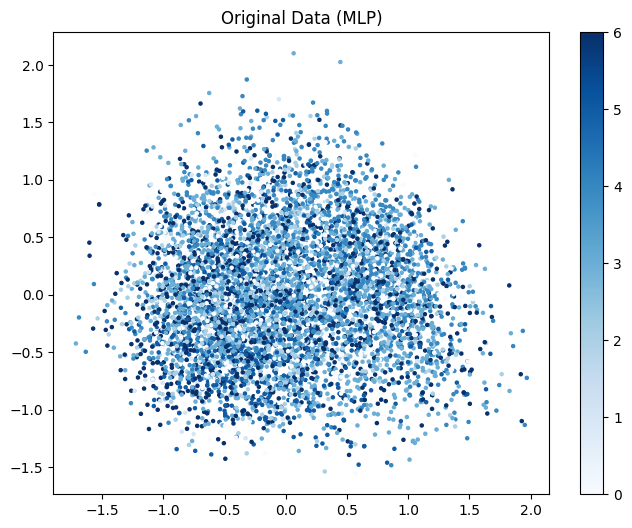

In [ ]:
## Plotting original data in 2D using PCA transformation
pca_2d = PCA(n_components=2)
testX_2d = pca_2d.fit_transform(testX)

fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(testX_2d[:, 0], testX_2d[:, 1], c=pred, cmap='Blues', s=5)
plt.colorbar(sc, ax=ax)
ax.set_title('Original Data (MLP)')
plt.show()

#### Transformed data

In [ ]:
## Building model

model_mlp_pca = build_model(trainX_pca, trainY_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
## Tuning

## In this model, we just try out some recommended online to see what could work
param_grid = {
    'mlpclassifier__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50, 25)],
    'mlpclassifier__activation': ['relu'],
'mlpclassifier__solver': ['adam'],
'mlpclassifier__learning_rate': ['constant', 'adaptive'],
'mlpclassifier__max_iter': [100, 200, 300]}

model_mlp_pca = GridSearchCV(estimator = model_mlp_pca, param_grid = param_grid,
                          cv = 5, n_jobs = -1, verbose = 0)
model_mlp_pca.fit(trainX,trainY)

model_mlp_pca = model_mlp_pca.best_estimator_

In [ ]:
## Saving model

import pickle


with open(save_path + 'model_mlp_pca.pkl','wb') as f:
    pickle.dump(model_mlp_pca,f)

In [ ]:
## Loading model
import pickle
path = '/content/drive/MyDrive/'
with open(save_path + 'model_mlp_pca.pkl' , 'rb') as f:
    model_mlp_pca = pickle.load(f)

In [ ]:
## Evaluation

pred = model_mlp_pca.predict(testX_pca)
calculate_performance(testY_pca, pred)

              precision    recall  f1-score   support

           0       0.36      0.27      0.31       985
           1       0.47      0.16      0.24       102
           2       0.35      0.20      0.25      1043
           3       0.63      0.71      0.67      1765
           4       0.34      0.44      0.38      1210
           5       0.59      0.55      0.57       795
           6       0.40      0.48      0.43      1278

    accuracy                           0.46      7178
   macro avg       0.45      0.40      0.41      7178
weighted avg       0.46      0.46      0.45      7178



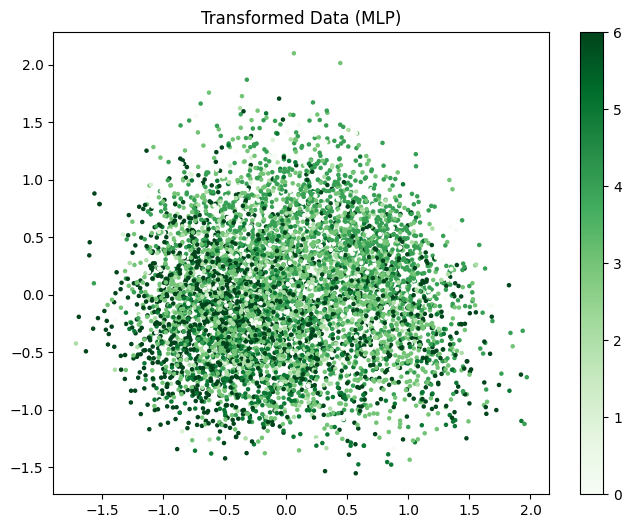

In [ ]:
## Plotting
# PCA with 2 components for visualization of transformed data
testX_pca_2d = pca_2d.fit_transform(testX_pca)

# Plotting PCA data in 2D
plt.figure(figsize=(8, 6))
sc = plt.scatter(testX_pca_2d[:, 0], testX_pca_2d[:, 1], c=pred, cmap='Greens', s=5)
plt.colorbar(sc)
plt.title('Transformed Data (MLP)')
plt.show()

## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



### Classification report

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

# Define models
models_original = [model_rf, model_svc, model_xgb, model_mlp]

# Create DataFrame for storing the report
report = pd.DataFrame(columns=['Model Name', 'Precision', 'Recall', 'Fscore'])

# Evaluate models trained on original data
for model in models_original:
    precision, recall, fscore, _ = score(testY, model.predict(testX), average='weighted')
    report.loc[len(report.index)] = [type(model.named_steps[model.steps[-1][0]]).__name__, round(precision,3), round(recall,3), round(fscore,3)]

In [ ]:
report = report.sort_values(by='Fscore', ascending=False).reset_index(drop=True)
report

,Model Name,Precision,Recall,Fscore
0,SVC,0.528,0.524,0.515
1,XGBClassifier,0.498,0.498,0.491
2,MLPClassifier,0.442,0.445,0.442
3,RandomForestClassifier,0.475,0.461,0.441


### Confusion matrix

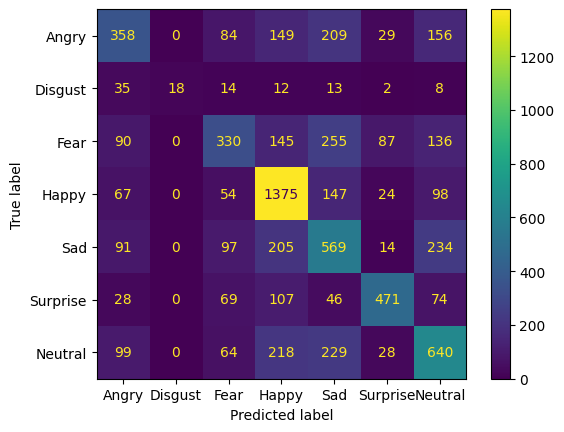

In [ ]:
## According to classification report, SVC is the best model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pred = model_svc.predict(testX)
cm = confusion_matrix(testY, pred, labels=[0,1,2,3,4,5,6])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"])

disp.plot()